### 종목 선정 과정

- 상관성이 낮은 종목으로 구성
- 단기, 중기, 장기 상관성 비교
- 주식, 채권, 원자재, 금, 달러

-> 장기투자 특성을 고려하여 모든 종목을 ETF로 담음

In [ ]:
from matplotlib import rc
rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

### 연도별 히트맵 & 상관관계

[*********************100%***********************]  17 of 17 completed

2 Failed downloads:
['XLRE', 'XLC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2007-01-01 -> 2009-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1167627600, endDate = 1262235600")')


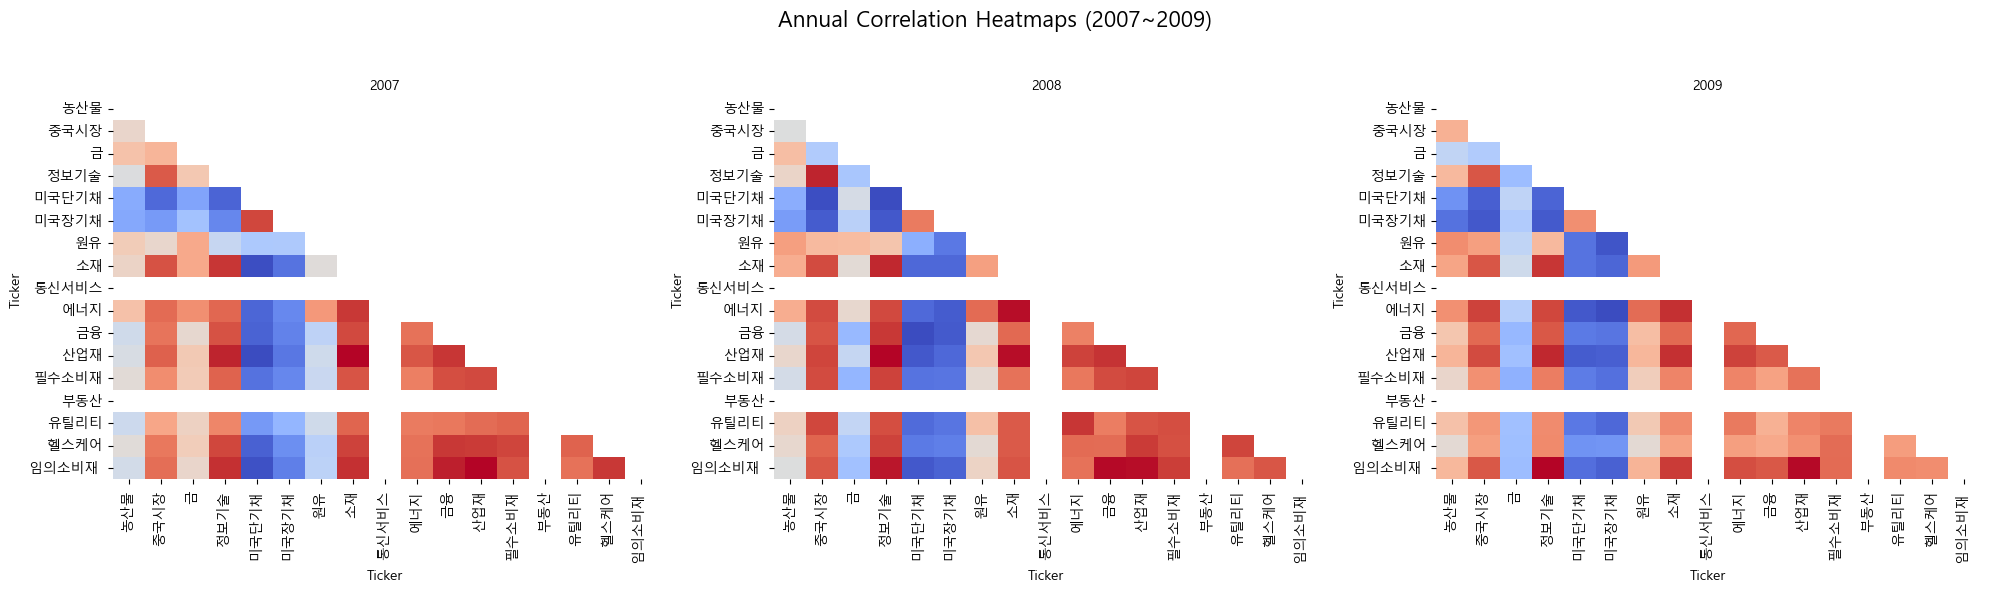

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc


# 데이터 불러오기
data = pd.read_csv(f'/Users/user/Desktop/수금의왕/sector(assets).csv', encoding="utf-8")
tickers = data['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(data['티커'], data['섹터(자산군)']))

# 데이터 다운로드
data = yf.download(assets, start="2007-01-01", end="2009-12-31")['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
data.rename(columns=ticker_to_name, inplace=True)

# 로그 수익률 계산
log_returns = data.pct_change().apply(lambda x: np.log(1 + x))

# 연도별 상관분석 및 1x3 그리드 시각화
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # 1행 3열 그리드 생성
fig.suptitle("Annual Correlation Heatmaps (2007~2009)", fontsize=16)

plot_idx = 0  # 플롯 인덱스 초기화
for year in range(2007, 2010):  # 2007~2009년
    # 연도 데이터 필터링
    yearly_data = data[data.index.year == year]
    if yearly_data.empty:  # 데이터가 없는 경우 건너뜀
        continue

    log_returns = yearly_data.pct_change().apply(lambda x: np.log(1 + x))  # 로그 수익률 계산
    correlation_matrix = log_returns.corr()  # 상관관계 계산

    # 현재 플롯 좌표 계산
    ax = axes[plot_idx]
    plot_idx += 1

    # 상삼각형 마스킹
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    # 히트맵 시각화
    sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', fmt=".2f", ax=ax, cbar=False)
    ax.set_title(f"{year}", fontsize=10)

# 남은 플롯 비활성화 (필요 시)
for i in range(plot_idx, 3):  # 총 3개의 플롯이므로 남은 플롯 비활성화
    axes[i].axis("off")

# 전체 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [5]:
# 상관계수 행렬에서 상관계수가 낮은 항목 추출
low_corr_pairs = []

# 상관계수 행렬 반복
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if np.abs(corr_value) <= 0.2:  # 절댓값 기준
            low_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))

# 데이터프레임 생성 및 정렬
low_corr_assets_ticker = pd.DataFrame(low_corr_pairs, columns=['자산 1', '자산 2', '상관계수'])
low_corr_assets_ticker['상관계수'] = low_corr_assets_ticker['상관계수'].round(2)  # 소수점 2자리 반올림
low_corr_assets_ticker['절댓값'] = np.abs(low_corr_assets_ticker['상관계수'])  # 절댓값 추가
low_corr_df_sorted = low_corr_assets_ticker.sort_values(by='절댓값')  # 절댓값 기준 정렬
low_corr_df_sorted = low_corr_df_sorted.drop(columns=['절댓값'])  # 절댓값 칼럼 삭제

# 상관계수가 낮은 항목 출력
low_corr_df_sorted

,자산 1,자산 2,상관계수
8,금,금융,-0.00
3,금,정보기술,0.02
13,금,임의소비재,0.02
9,금,산업재,0.03
10,금,필수소비재,-0.03
11,금,유틸리티,0.03
12,금,헬스케어,0.03
2,중국시장,금,0.09
5,금,미국장기채,0.10
7,금,에너지,0.11


### 분기별 히트맵 & 상관관계

[*********************100%***********************]  17 of 17 completed

2 Failed downloads:
['XLRE', 'XLC']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2007-01-01 -> 2009-12-31) (Yahoo error = "Data doesn\'t exist for startDate = 1167627600, endDate = 1262235600")')


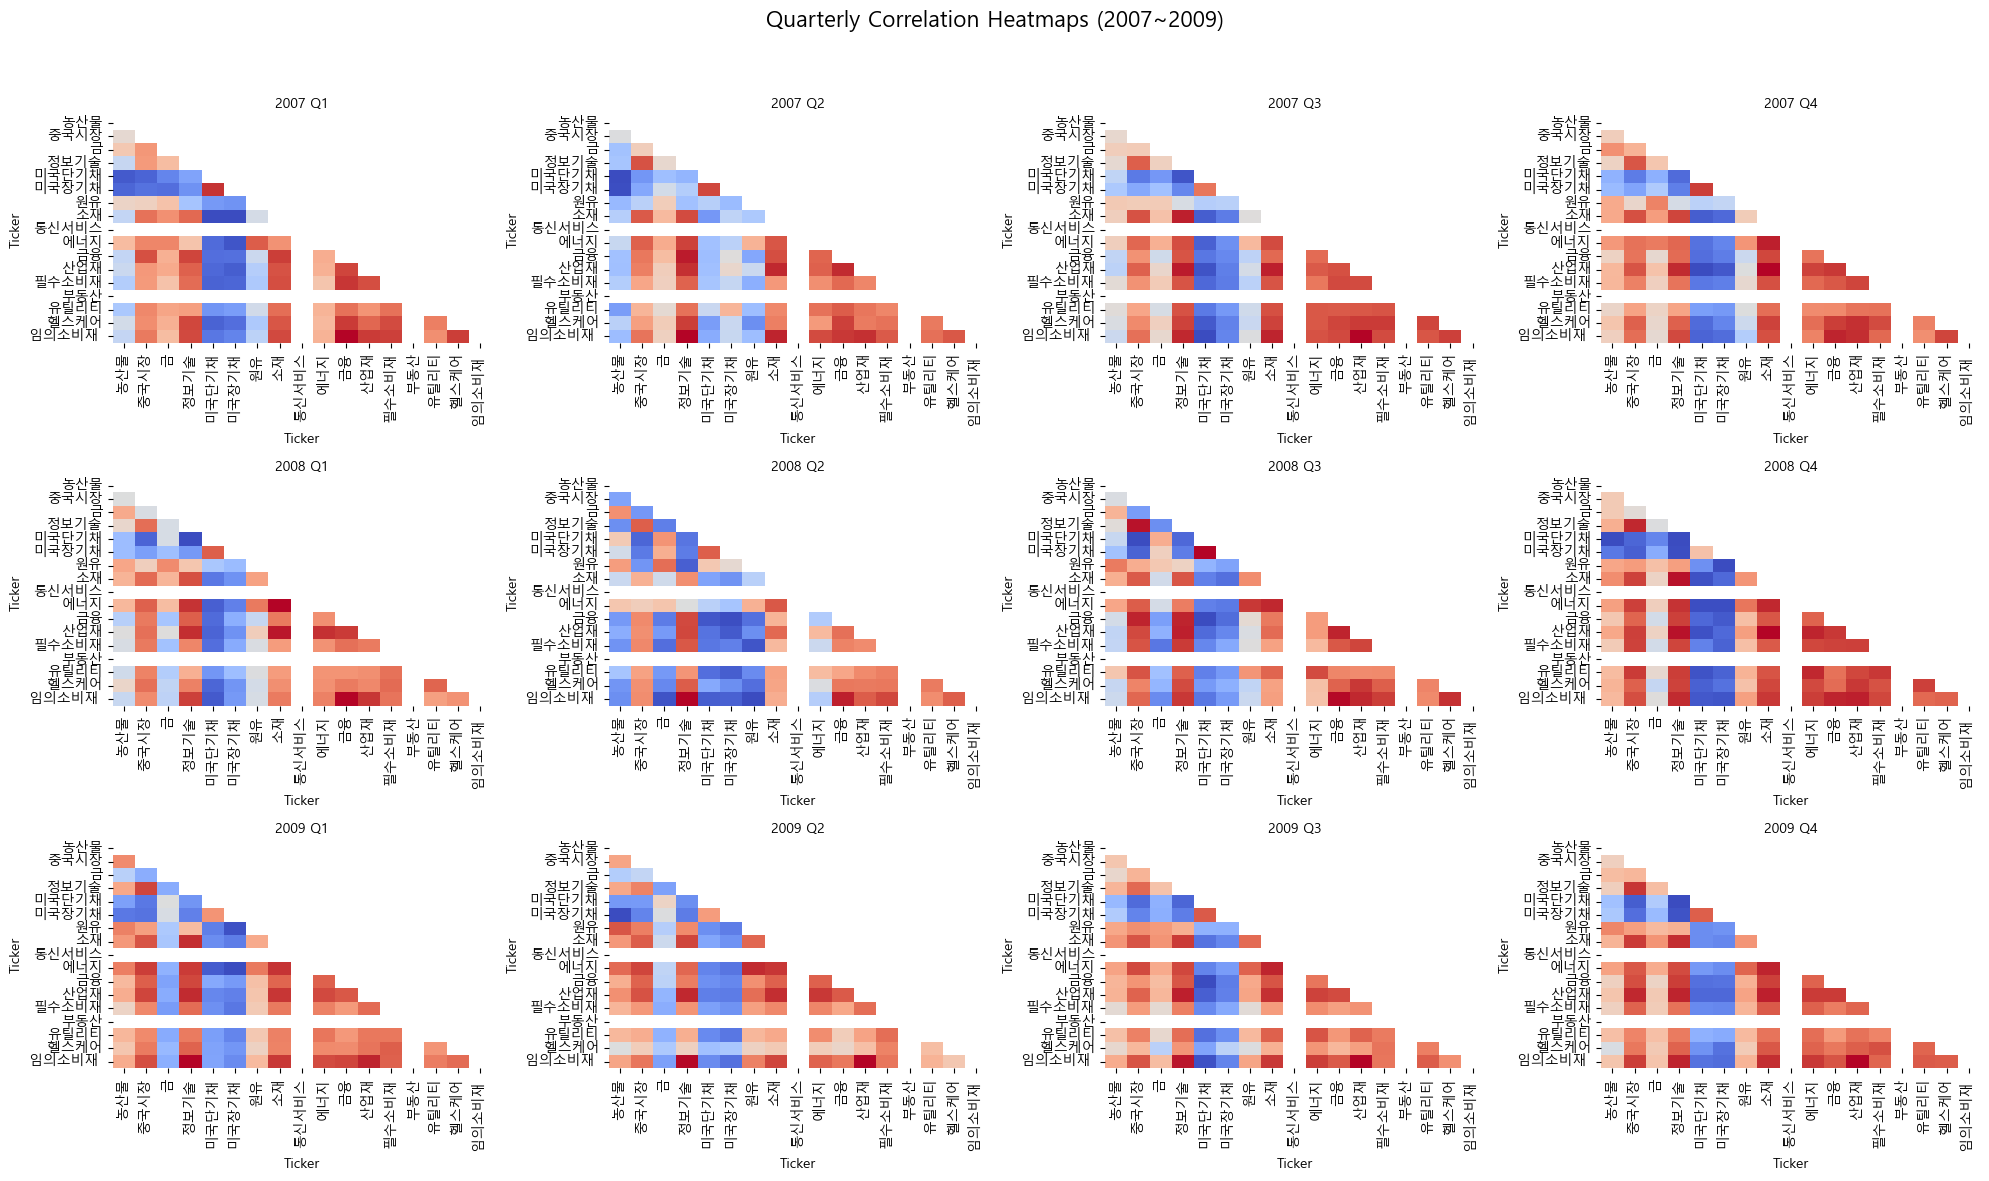

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 데이터 불러오기
data = pd.read_csv(f'/Users/user/Desktop/수금의왕/sector(assets).csv', encoding="utf-8")
tickers = data['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(data['티커'], data['섹터(자산군)']))

# 데이터 다운로드
data = yf.download(assets, start="2007-01-01", end="2009-12-31")['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
data.rename(columns=ticker_to_name, inplace=True)

# 로그 수익률 계산
log_returns = data.pct_change().apply(lambda x: np.log(1 + x))

# 분기별 상관분석 및 3x4 그리드 시각화
fig, axes = plt.subplots(3, 4, figsize=(20, 12))  # 3행 4열 그리드 생성
fig.suptitle("Quarterly Correlation Heatmaps (2007~2009)", fontsize=16)

plot_idx = 0  # 플롯 인덱스 초기화
for year in range(2007, 2010):  # 2007~2009년
    for quarter in range(1, 5):  # 1~4분기
        # 분기 데이터 필터링
        quarterly_data = data[(data.index.year == year) & (data.index.quarter == quarter)]
        if quarterly_data.empty:  # 데이터가 없는 경우 건너뜀
            continue

        log_returns = quarterly_data.pct_change().apply(lambda x: np.log(1 + x))  # 로그 수익률 계산
        correlation_matrix = log_returns.corr()  # 상관관계 계산
        
        # 현재 플롯 좌표 계산
        row, col = divmod(plot_idx, 4)  # 4열 기준으로 행과 열 결정
        ax = axes[row, col]
        plot_idx += 1

        # 상삼각형 마스킹
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
        
        # 히트맵 시각화
        sns.heatmap(correlation_matrix, mask=mask, annot=False, cmap='coolwarm', fmt=".2f", ax=ax, cbar=False)
        ax.set_title(f"{year} Q{quarter}", fontsize=10)

# 나머지 빈 플롯 비활성화
for i in range(plot_idx, 12):  # 총 12개의 플롯이므로 남은 플롯 비활성화
    row, col = divmod(i, 4)
    axes[row, col].axis("off")

# 전체 레이아웃 조정
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [9]:
# 상관계수 행렬에서 상관계수가 낮은 항목 추출
low_corr_pairs = []

# 상관계수 행렬 반복
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if np.abs(corr_value) <= 0.2:  # 절댓값 기준
            low_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_value))

# 데이터프레임 생성 및 정렬
low_corr_assets_ticker = pd.DataFrame(low_corr_pairs, columns=['자산 1', '자산 2', '상관계수'])
low_corr_assets_ticker['상관계수'] = low_corr_assets_ticker['상관계수'].round(2)  # 소수점 2자리 반올림
low_corr_assets_ticker['절댓값'] = np.abs(low_corr_assets_ticker['상관계수'])  # 절댓값 추가
low_corr_df_sorted = low_corr_assets_ticker.sort_values(by='절댓값')  # 절댓값 기준 정렬
low_corr_df_sorted = low_corr_df_sorted.drop(columns=['절댓값'])  # 절댓값 칼럼 삭제

# 상관계수가 낮은 항목 출력
low_corr_df_sorted

,자산 1,자산 2,상관계수
0,농산물,미국단기채,-0.01
1,농산물,미국장기채,0.03
3,금,미국장기채,-0.04
2,금,미국단기채,0.05
5,미국단기채,유틸리티,-0.08
8,미국장기채,유틸리티,-0.10
4,미국단기채,에너지,-0.17
6,미국단기채,헬스케어,-0.19
7,미국장기채,원유,-0.19


# 투자 백테스트

벤치마크1) 레이달리오 사계절 포트폴리오

- 위험자산 30%
- 중기채 15%
- 장기채 40%
- 금 5.5%
- 상품 7.5%

벤치마크2) 영구 포트폴리오

- 주식 25%
- 채권 25%
- 금 25%
- 원자재 25%

In [12]:
import bt
import pandas as pd
import yfinance as yf
import numpy as np

[*********************100%***********************]  17 of 17 completed
[*********************100%***********************]  5 of 5 completed


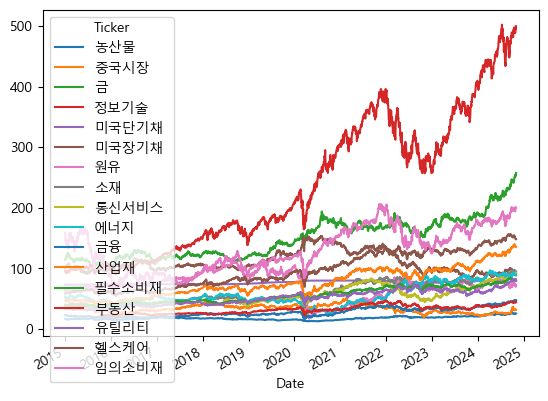

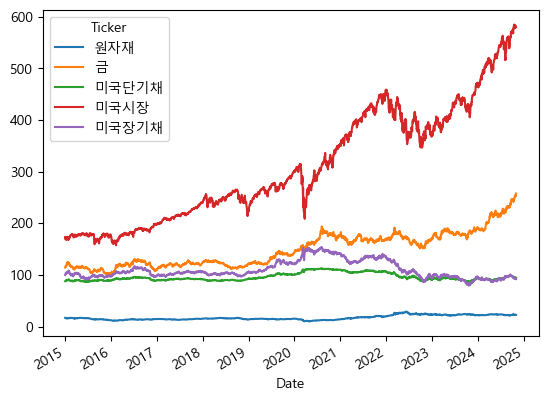

In [70]:
start = '2015-01-01'
end = '2024-10-31'

# 데이터 불러오기
data = pd.read_csv(f'/Users/user/Desktop/수금의왕/sector(assets).csv', encoding="utf-8")
tickers = data['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(data['티커'], data['섹터(자산군)']))

# 데이터 다운로드
data = yf.download(assets, start=start, end=end)['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
data.rename(columns=ticker_to_name, inplace=True)

data.plot()




# 벤치마크 데이터 불러오기
df = pd.read_csv(f'/Users/user/Desktop/수금의왕/벤치마크종목.csv', encoding="utf-8")
tickers = df['티커'].tolist()

assets = tickers

# 티커를 섹터(자산군)으로 매핑
ticker_to_name = dict(zip(df['티커'], df['섹터(자산군)']))

# 데이터 다운로드
df = yf.download(assets, start=start, end=end)['Adj Close']

# prices의 칼럼명(티커)을 "섹터(자산군)"으로 변환
df.rename(columns=ticker_to_name, inplace=True)

df.plot()


data.replace(0, np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)

In [26]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


(<AxesSubplot:>, <AxesSubplot:>)

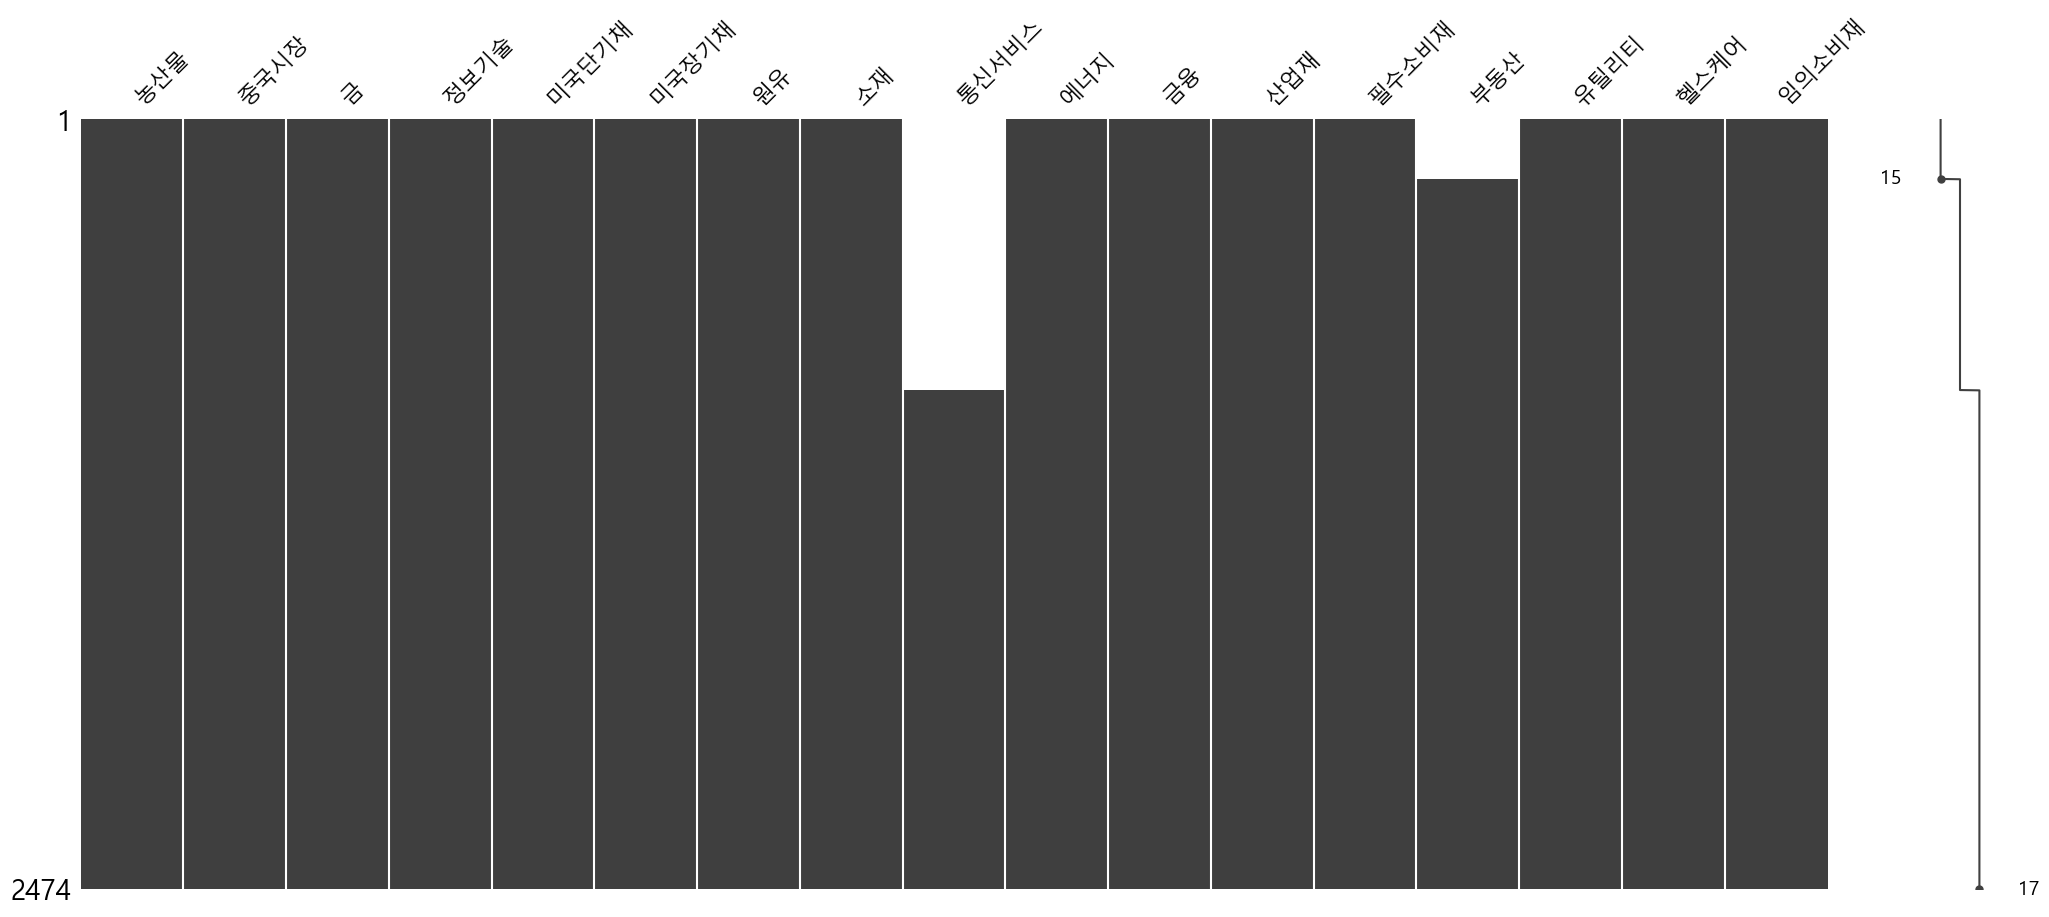

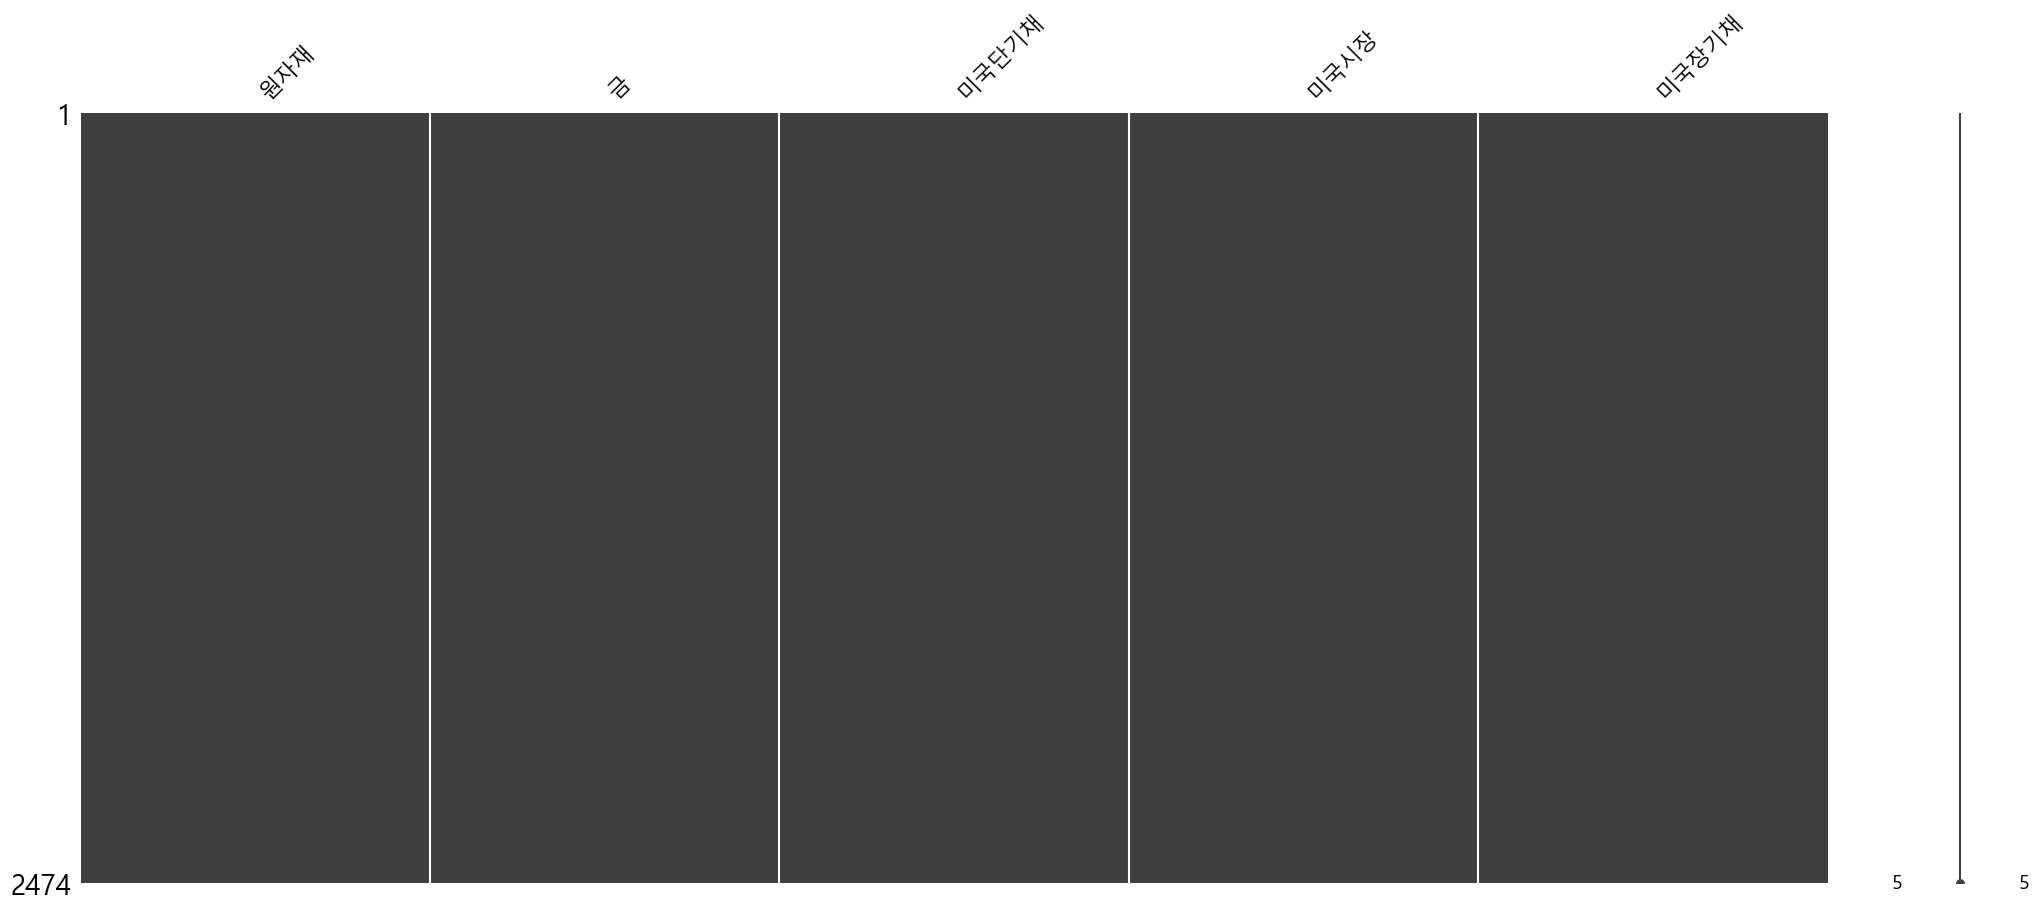

In [71]:
import missingno as msno
msno.matrix(data), msno.matrix(df)

In [72]:
data.isnull().sum(), df.isnull().sum()

(Ticker
 농산물         0
 중국시장        0
 금           0
 정보기술        0
 미국단기채       0
 미국장기채       0
 원유          0
 소재          0
 통신서비스     871
 에너지         0
 금융          0
 산업재         0
 필수소비재       0
 부동산       193
 유틸리티        0
 헬스케어        0
 임의소비재       0
 dtype: int64,
 Ticker
 원자재      0
 금        0
 미국단기채    0
 미국시장     0
 미국장기채    0
 dtype: int64)

## 상원 전략

In [73]:
s = bt.Strategy('Sangwon',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                #  bt.algos.WeighEqually(),
                 bt.algos.WeighSpecified(**{
                     '정보기술': 0.15,
                     '금융': 0.04,
                     '헬스케어': 0.04,
                     '산업재': 0.04,
                     '필수소비재': 0.04,
                     '에너지': 0.04,
                     '소재': 0.04,
                     '유틸리티': 0.04,
                     '중국시장': 0.15,
                     '미국장기채': 0.14,
                     '미국단기채': 0.14,
                     '금': 0.07,
                     '원유': 0.04,
                     '농산물': 0.03
                     }),            
                 bt.algos.Rebalance()
                 ])

bt1 = bt.Backtest(s, data, initial_capital=10000000)

In [74]:
# 벤치마크 - 미국시장
def buy_and_hold(df, name='buy_and_hold') :
    s = bt.Strategy(name, [bt.algos.RunOnce(),
                           bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
    return bt.Backtest(s, df, initial_capital=10000000)


SPY = buy_and_hold(df['미국시장'].to_frame(), name='SPY')

In [75]:
# 벤치마크 - 올웨더
all_weather = bt.Strategy('all_weather',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                 bt.algos.WeighSpecified(**{
                     '미국시장': 0.30,
                     '미국장기채': 0.40,
                     '미국단기채': 0.15,
                     '금': 0.055,
                     '원자재': 0.075
                     }),            
                 bt.algos.Rebalance()
                 ])

all_weather = bt.Backtest(all_weather, df, initial_capital=10000000)

In [76]:
# 벤치마크 - 영구포트폴리오
permanant = bt.Strategy('permanant',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                 bt.algos.WeighSpecified(**{
                     '미국시장': 0.25,
                     '미국장기채': 0.25,
                     '금': 0.25,
                     '원자재': 0.25
                     }),            
                 bt.algos.Rebalance()
                 ])

permanant = bt.Backtest(permanant, df, initial_capital=10000000)

In [77]:
res = bt.run(bt1, all_weather, permanant, SPY)

100%|██████████| 4/4 [00:01<00:00,  2.31it/s]


<AxesSubplot:title={'center':'Equity Progression'}>

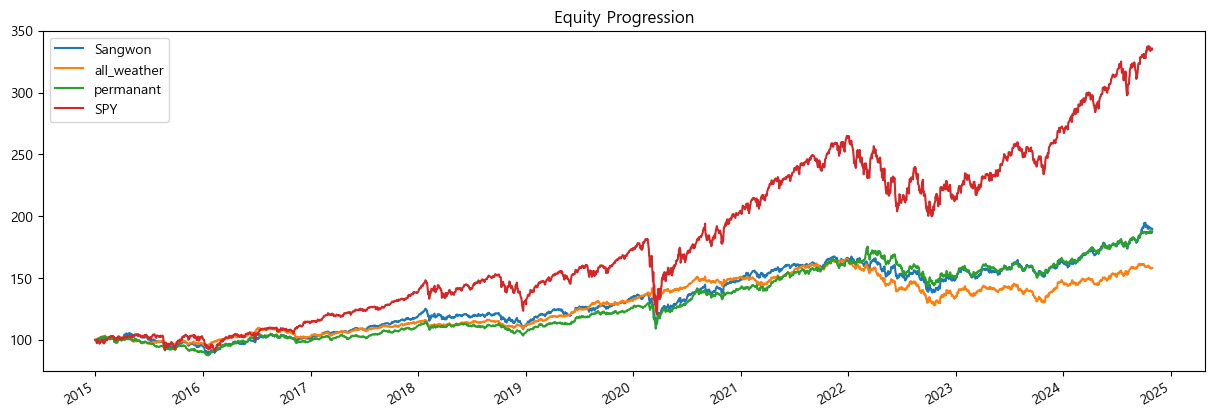

In [78]:
res.plot()

In [21]:
res.display()

Stat                 Sangwon     all_weather    permanant    SPY
-------------------  ----------  -------------  -----------  ----------
Start                2010-01-03  2010-01-03     2010-01-03   2010-01-03
End                  2024-10-30  2024-10-30     2024-10-30   2024-10-30
Risk-free rate       0.00%       0.00%          0.00%        0.00%

Total Return         188.97%     154.92%        150.89%      571.96%
Daily Sharpe         0.75        0.86           0.74         0.84
Daily Sortino        1.20        1.38           1.17         1.30
CAGR                 7.42%       6.52%          6.40%        13.71%
Max Drawdown         -18.20%     -22.82%        -18.42%      -33.72%
Calmar Ratio         0.41        0.29           0.35         0.41

MTD                  -0.40%      -1.77%         0.87%        1.09%
3m                   7.51%       3.27%          6.48%        7.34%
6m                   11.70%      9.53%          10.44%       16.27%
YTD                  16.10%      7.56%      

### 전략 develop

### 1) 상관관계 -> 비중 조절

In [82]:
# 상관계수 행렬 생성
log_returns = data.pct_change().apply(lambda x: np.log(1 + x))
correlation_matrix = log_returns.corr()

# '통신서비스'와 '부동산' 섹터를 제외한 상관계수 행렬
excluded_sectors = ['통신서비스', '부동산']
filtered_correlation_matrix = correlation_matrix.loc[
    ~correlation_matrix.index.isin(excluded_sectors),
    ~correlation_matrix.columns.isin(excluded_sectors)
]

In [83]:
# 섹터별 평균 상관계수 계산
sector_corr_mean = filtered_correlation_matrix.mean(axis=1)

# 음수 또는 0 방지 (절댓값으로 처리하거나 최소값 설정)
sector_corr_mean = sector_corr_mean.clip(lower=1e-6)  # 최소값 제한

# 역수 가중치 계산 (절댓값 사용)
weights = 1 / np.abs(sector_corr_mean)

# 정규화하여 합이 1이 되도록 조정
weights_normalized = weights / weights.sum()

# 가중치 출력
sector_weights = dict(weights_normalized)
print("섹터별 최종 비중:", sector_weights)

# 백테스트 전략 생성
ex = bt.Strategy('ex',
                [bt.algos.RunYearly(run_on_first_date=True,
                                    run_on_end_of_period=True,
                                    run_on_last_date=False),
                 bt.algos.SelectAll(),
                 bt.algos.WeighSpecified(**sector_weights),  # 자동 계산된 비중 적용
                 bt.algos.Rebalance()
                 ])

# 백테스트 실행
bt2 = bt.Backtest(ex, data, initial_capital=10000000)


섹터별 최종 비중: {'농산물': 4.963416610738737e-06, '중국시장': 2.8916181005657354e-06, '금': 5.986691233327671e-06, '정보기술': 2.1496161271194938e-06, '미국단기채': 1.2173794153702303e-05, '미국장기채': 0.999950302349395, '원유': 3.896994709253264e-06, '소재': 1.9697405823161195e-06, '에너지': 2.417463781525884e-06, '금융': 2.146301921152657e-06, '산업재': 1.9760850464440267e-06, '필수소비재': 2.256608231431337e-06, '유틸리티': 2.5785742922708855e-06, '헬스케어': 2.1987043614379777e-06, '임의소비재 ': 2.0920414538085514e-06}


In [84]:
sector_weights

{'농산물': 4.963416610738737e-06,
 '중국시장': 2.8916181005657354e-06,
 '금': 5.986691233327671e-06,
 '정보기술': 2.1496161271194938e-06,
 '미국단기채': 1.2173794153702303e-05,
 '미국장기채': 0.999950302349395,
 '원유': 3.896994709253264e-06,
 '소재': 1.9697405823161195e-06,
 '에너지': 2.417463781525884e-06,
 '금융': 2.146301921152657e-06,
 '산업재': 1.9760850464440267e-06,
 '필수소비재': 2.256608231431337e-06,
 '유틸리티': 2.5785742922708855e-06,
 '헬스케어': 2.1987043614379777e-06,
 '임의소비재 ': 2.0920414538085514e-06}

In [85]:
sum_of_weights = sum(sector_weights.values())
sum_of_weights

1.0000000000000002

In [86]:
result = bt.run(bt1,bt2)
result.display()

100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

Stat                 Sangwon     ex
-------------------  ----------  ----------
Start                2015-01-01  2015-01-01
End                  2024-10-30  2024-10-30
Risk-free rate       0.00%       0.00%

Total Return         89.69%      -7.74%
Daily Sharpe         0.67        0.02
Daily Sortino        1.05        0.04
CAGR                 6.73%       -0.82%
Max Drawdown         -18.20%     -48.35%
Calmar Ratio         0.37        -0.02

MTD                  -0.40%      -5.61%
3m                   7.51%       -0.68%
6m                   11.70%      6.73%
YTD                  16.10%      -3.86%
1Y                   25.13%      14.30%
3Y (ann.)            4.57%       -11.69%
5Y (ann.)            8.09%       -5.63%
10Y (ann.)           6.73%       -0.82%
Since Incep. (ann.)  6.73%       -0.82%

Daily Sharpe         0.67        0.02
Daily Sortino        1.05        0.04
Daily Mean (ann.)    7.09%       0.35%
Daily Vol (ann.)     10.61%      15.30%
Daily Skew           -0.56       0.11
D

### 2) 전략 다양화

`Momentum Risk Parity 전략`

- Risk Parity(위험 균형) + Momentum(모멘텀) 결합

- 모멘텀 요소를 추가하여 상승 추세에 있는 자산에 더 높은 비중을 할당

: Total Return은 확실히 커지지만 MDD는 하락함

Momentum Risk Parity Weights: Ticker
농산물       0.043545
중국시장      0.027713
금         0.094739
정보기술      0.085892
미국단기채     0.097254
미국장기채     0.032365
원유        0.000000
소재        0.068637
에너지       0.013914
금융        0.135728
산업재       0.108981
필수소비재     0.074814
유틸리티      0.082271
헬스케어      0.069216
임의소비재     0.064932
Name: 2024-10-30 00:00:00+00:00, dtype: float64


100%|██████████| 2/2 [00:00<00:00,  2.63it/s]


Stat                 Sangwon     Momentum_Risk_Parity
-------------------  ----------  ----------------------
Start                2015-01-01  2015-01-01
End                  2024-10-30  2024-10-30
Risk-free rate       0.00%       0.00%

Total Return         89.69%      141.01%
Daily Sharpe         0.67        0.80
Daily Sortino        1.05        1.23
CAGR                 6.73%       9.36%
Max Drawdown         -18.20%     -25.44%
Calmar Ratio         0.37        0.37

MTD                  -0.40%      0.16%
3m                   7.51%       7.18%
6m                   11.70%      12.80%
YTD                  16.10%      18.79%
1Y                   25.13%      31.92%
3Y (ann.)            4.57%       7.54%
5Y (ann.)            8.09%       11.17%
10Y (ann.)           6.73%       9.36%
Since Incep. (ann.)  6.73%       9.36%

Daily Sharpe         0.67        0.80
Daily Sortino        1.05        1.23
Daily Mean (ann.)    7.09%       9.70%
Daily Vol (ann.)     10.61%      12.16%
Daily Skew     

<AxesSubplot:title={'center':'Comparison: Original vs Momentum Risk Parity'}>

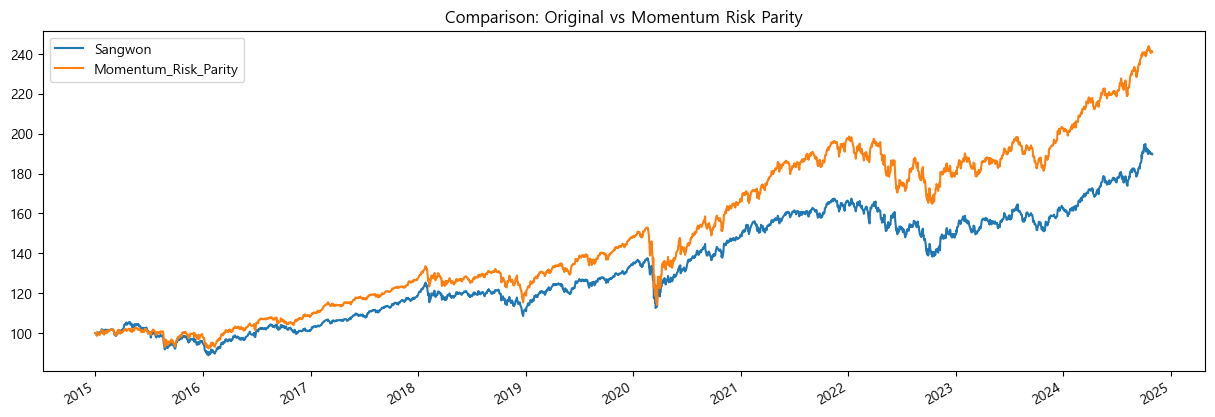

In [ ]:
# 통신서비스와 부동산 섹터 제외
excluded_sectors = ['통신서비스', '부동산']
data = data.drop(columns=excluded_sectors, errors='ignore')

# 모멘텀 계산: 최근 12개월 수익률
momentum = data.pct_change(252).iloc[-1]  # 252는 1년 거래일 기준

# 변동성 계산: 최근 12개월 표준편차
volatility = data.pct_change().rolling(252).std().iloc[-1]

# 모멘텀 Risk Parity 비중 계산
weights = momentum / volatility    # 모멘텀을 변동성으로 나눔
weights = weights.clip(lower=0)    # 음수 가중치 제거
weights = weights / weights.sum()  # 정규화하여 합이 1로 맞춤

# 비중 출력
print("Momentum Risk Parity Weights:", weights)

# 전략 생성
strategy_mrp_filtered = bt.Strategy('Momentum_Risk_Parity',
                                    [bt.algos.RunYearly(run_on_first_date=True,
                                                        run_on_end_of_period=True,
                                                        run_on_last_date=False),
                                     bt.algos.SelectAll(),
                                     bt.algos.WeighSpecified(**weights.to_dict()),
                                     bt.algos.Rebalance()
                                     ])

# 백테스트 실행
bt_mrp_filtered = bt.Backtest(strategy_mrp_filtered, data, initial_capital=10000000)

# 기존 전략과 비교
result_filtered = bt.run(bt1, bt_mrp_filtered)

# 결과 출력
result_filtered.display()
result_filtered.plot(title="Comparison: Original vs Momentum Risk Parity")

In [93]:
round(weights,4)

Ticker
농산물       0.0435
중국시장      0.0277
금         0.0947
정보기술      0.0859
미국단기채     0.0973
미국장기채     0.0324
원유        0.0000
소재        0.0686
에너지       0.0139
금융        0.1357
산업재       0.1090
필수소비재     0.0748
유틸리티      0.0823
헬스케어      0.0692
임의소비재     0.0649
Name: 2024-10-30 00:00:00+00:00, dtype: float64

In [88]:
import pandas as pd
import numpy as np
import bt

# 로그 수익률 데이터 생성
log_returns = data.pct_change().apply(lambda x: np.log(1 + x))

# 모멘텀 계산: 최근 12개월 수익률
momentum = data.pct_change(252).iloc[-1]  # 252는 1년 기준 거래일

# 변동성 계산: 최근 12개월 표준편차
volatility = data.pct_change().rolling(252).std().iloc[-1]

# 모멘텀 Risk Parity 비중 계산 (음수 제거)
weights = momentum / volatility
weights = weights.clip(lower=0)  # 음수 가중치를 0으로 설정
weights = weights / weights.sum()  # 정규화하여 합이 1로 맞춤

# 모멘텀 : 가중치 비중
weights_normalized = weights.to_dict()
print("음수 제거 후 가중치:", weights_normalized)

음수 제거 후 가중치: {'농산물': 0.03673258287664252, '중국시장': 0.023377377044649372, '금': 0.0799177744755412, '정보기술': 0.07245463178105711, '미국단기채': 0.08203942769901491, '미국장기채': 0.02730177361568203, '원유': 0.0, '소재': 0.05789978905171792, '통신서비스': 0.08867548965420348, '에너지': 0.011737416760304585, '금융': 0.11449480713114213, '산업재': 0.09193166237319404, '필수소비재': 0.06310987818784702, '부동산': 0.06776474014873002, '유틸리티': 0.06940051110962404, '헬스케어': 0.058388251098537895, '임의소비재 ': 0.05477388699211165}


In [81]:
# 가중치 음수 제거 후 전략 실행
strategy_mrp = bt.Strategy('Momentum_Risk_Parity',
                           [bt.algos.RunYearly(run_on_first_date=True,
                                               run_on_end_of_period=True,
                                               run_on_last_date=False),
                            bt.algos.SelectAll(),
                            bt.algos.WeighSpecified(**weights_normalized), 
                            bt.algos.Rebalance()
                            ])

# 백테스트 실행
bt_mrp2 = bt.Backtest(strategy_mrp, data, initial_capital=10000000)

# 기존 전략과 비교
result = bt.run(bt1, bt_mrp2)

# 결과 출력
result.display()
result.plot(title="Comparison: Original vs Momentum Risk Parity")

 50%|█████     | 1/2 [00:00<00:00, 52.17it/s]


Exception: Cannot allocate capital to 통신서비스 because price is nan as of 2015-01-02 00:00:00+00:00

### 3) 연간 변동성 계산 활용

`특징`

1. 위험 관리 강화
포트폴리오의 변동성을 목표 수준(예: 연간 10%)으로 조정하여 지나치게 높은 변동성을 억제
변동성이 낮은 시장에서는 상대적으로 비중을 늘리고, 변동성이 높은 시장에서는 비중을 줄여 시장 변동성에 따른 리스크를 효과적으로 제어

2. MDD(Max Drawdown) 감소 가능성
변동성을 목표 수준으로 유지함으로써 포트폴리오가 큰 손실을 경험할 가능성을 줄임.
리스크가 큰 자산(예: 원자재, 주식)에서 비중을 축소하고, 안정적인 자산(예: 채권, 금)의 비중을 늘려 하락장에서 더 나은 성과를 기대.

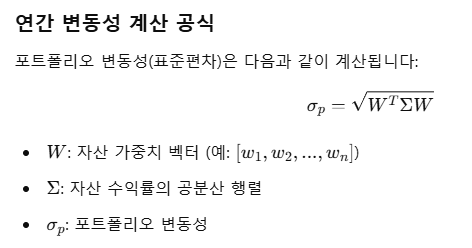

In [ ]:
import numpy as np

# 자산 가중치 (예: Risk Parity 또는 초기 비중에서 계산된 가중치)
weights = np.array(list(weights_normalized.values()))

# 공분산 행렬 (일일 수익률 기준)
cov_matrix = data.pct_change().cov()

# 연간 공분산 행렬 (일일 수익률 기준이므로 연간화)
annualized_cov_matrix = cov_matrix * 252  # 252는 1년 거래일 수

# 포트폴리오 연간 변동성 계산
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(annualized_cov_matrix, weights)))

print(f"포트폴리오 연간 변동성: {portfolio_volatility:.4f}")

포트폴리오 연간 변동성: 0.1239


조정된 가중치 (변동성 타겟팅 적용): {'농산물': 0.04354470442242705, '중국시장': 0.027712752888512104, '금': 0.09473866510618996, '정보기술': 0.08589145371523417, '미국단기채': 0.09725442312243973, '미국장기채': 0.032364954280095705, '원유': 0.0, '소재': 0.06863735857110846, '에너지': 0.01391414501915458, '금융': 0.13572812198512682, '산업재': 0.10898048139757378, '필수소비재': 0.07481369532835569, '유틸리티': 0.08227094876732036, '헬스케어': 0.06921650896604101, '임의소비재 ': 0.06493178643042054}


100%|██████████| 1/1 [00:02<00:00,  2.68s/it]


Stat                 Risk_Parity_with_Volatility_Target
-------------------  ------------------------------------
Start                2010-01-03
End                  2024-10-30
Risk-free rate       0.00%

Total Return         325.95%
Daily Sharpe         0.88
Daily Sortino        1.36
CAGR                 10.27%
Max Drawdown         -25.42%
Calmar Ratio         0.40

MTD                  0.17%
3m                   7.21%
6m                   12.82%
YTD                  18.71%
1Y                   31.83%
3Y (ann.)            7.58%
5Y (ann.)            11.21%
10Y (ann.)           9.57%
Since Incep. (ann.)  10.27%

Daily Sharpe         0.88
Daily Sortino        1.36
Daily Mean (ann.)    10.51%
Daily Vol (ann.)     12.01%
Daily Skew           -0.56
Daily Kurt           11.13
Best Day             6.87%
Worst Day            -7.77%

Monthly Sharpe       1.01
Monthly Sortino      1.89
Monthly Mean (ann.)  10.70%
Monthly Vol (ann.)   10.57%
Monthly Skew         -0.37
Monthly Kurt         0.41
B

<AxesSubplot:title={'center':'Risk Parity with Volatility Target'}>

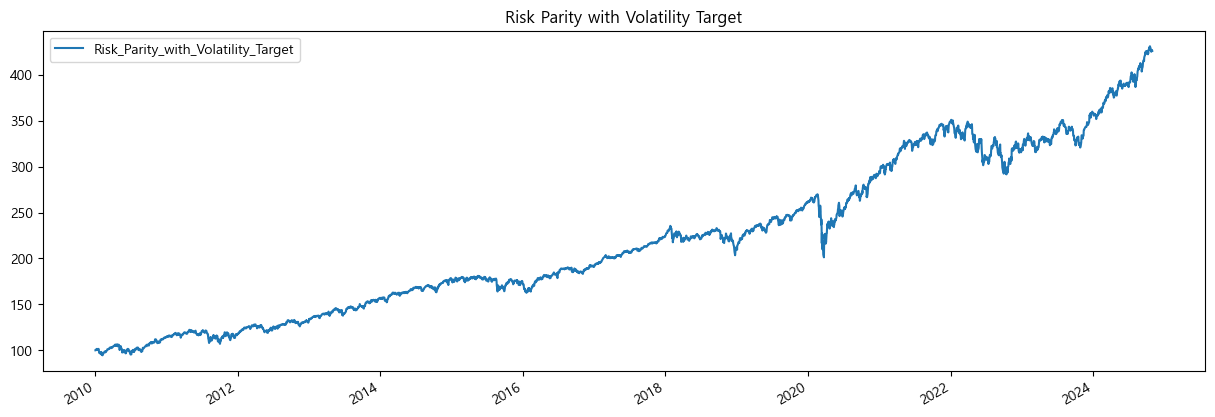

In [ ]:
import pandas as pd
import numpy as np
import bt

# 로그 수익률 및 공분산 행렬 계산
log_returns = data.pct_change().apply(lambda x: np.log(1 + x))
cov_matrix = log_returns.cov()  # 일일 공분산 행렬
annualized_cov_matrix = cov_matrix * 252  # 연간 공분산 행렬

# 가중치 계산 
weights = np.array(list(weights_normalized.values()))

# 포트폴리오 연간 변동성 계산
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(annualized_cov_matrix, weights)))

# 목표 변동성 설정 (예: 10%)
target_volatility = 0.10

# 변동성 타겟팅 스케일링
scaling_factor = target_volatility / portfolio_volatility
adjusted_weights = weights * scaling_factor
adjusted_weights = adjusted_weights / adjusted_weights.sum()  # 정규화

# 출력: 조정된 가중치
adjusted_weights_dict = dict(zip(weights_normalized.keys(), adjusted_weights))
print("조정된 가중치 (변동성 타겟팅 적용):", adjusted_weights_dict)

# 전략 정의
strategy_vol_target = bt.Strategy(
    'Risk_Parity_with_Volatility_Target',
    [
        bt.algos.RunYearly(),                              # 연간 리밸런싱
        bt.algos.SelectAll(),                              # 모든 자산 선택
        bt.algos.WeighSpecified(**adjusted_weights_dict),  # 조정된 가중치 적용
        bt.algos.Rebalance()                               # 리밸런싱 실행
    ]
)

# 백테스트 실행
bt_vol_target = bt.Backtest(strategy_vol_target, data)
result_vol_target = bt.run(bt_vol_target)

# 결과 출력
result_vol_target.display()
result_vol_target.plot(title="Risk Parity with Volatility Target")

### 효율적 Frontier

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed

1 Failed download:
['ATVI']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed

1 Failed download:
['PXD']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed
[*********             1


섹터별 선정된 최적 종목:
{'IT': 'NVDA', 'Financials': 'SPGI', 'Healthcare': 'LLY', 'Consumer': 'AMZN', 'Industrial': 'DE', 'Communication_Service': 'TMUS', 'Consumer_Staples_Defensive': 'COST', 'Energy': 'MPC', 'Real_Estate': 'EQIX', 'Materials': 'LIN', 'Utility': 'NEE'}


[*********************100%***********************]  11 of 11 completed



최대 샤프 비율 포트폴리오:
Return          0.001264
Risk            0.012994
Sharpe Ratio    0.094192
Weight_NVDA     0.076552
Weight_SPGI     0.177921
Weight_LLY      0.119286
Weight_AMZN     0.038295
Weight_DE       0.031269
Weight_TMUS     0.206911
Weight_COST     0.019275
Weight_MPC      0.043944
Weight_EQIX     0.191596
Weight_LIN      0.022302
Weight_NEE      0.072650
Name: 4146, dtype: float64

최소 위험 포트폴리오:
Return          0.000892
Risk            0.010809
Sharpe Ratio    0.078881
Weight_NVDA     0.052699
Weight_SPGI     0.152656
Weight_LLY      0.099343
Weight_AMZN     0.069725
Weight_DE       0.173919
Weight_TMUS     0.156513
Weight_COST     0.018506
Weight_MPC      0.112026
Weight_EQIX     0.006099
Weight_LIN      0.043980
Weight_NEE      0.114535
Name: 4046, dtype: float64


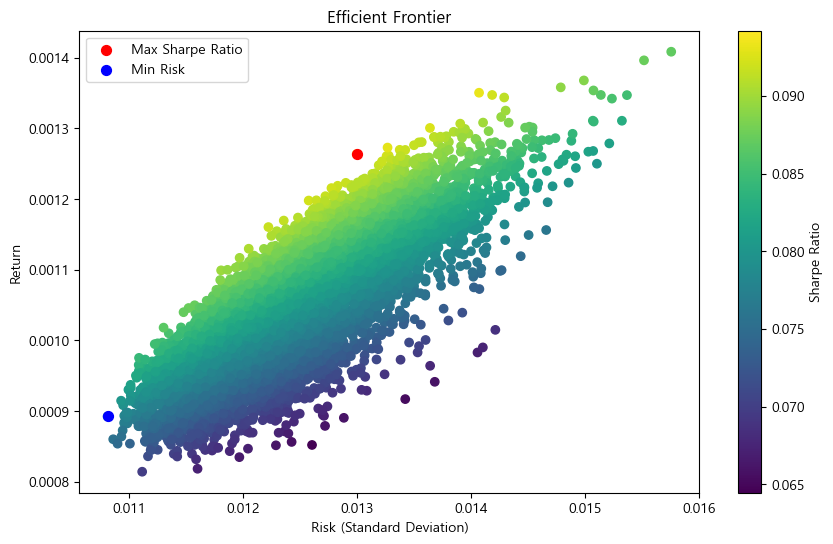

In [69]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 섹터별 티커 목록
sectors = {
    'IT': ['AAPL', 'MSFT', 'NVDA', 'AVGO', 'ADBE', 'CSCO', 'CRM', 'ACN', 'ORCL', 'AMD'],
    'Financials': ['BRK-B', 'JPM', 'V', 'MA', 'BAC', 'WFC', 'SPGI', 'MS', 'GS', 'BLK'],
    'Healthcare': ['UNH', 'JNJ', 'LLY', 'MRK', 'ABBV', 'PFE', 'TMO', 'ABT', 'DHR', 'BMY'],
    'Consumer': ['AMZN', 'TSLA', 'HD', 'NKE', 'MCD', 'LOW', 'SBUX', 'BKNG', 'T', 'F'],
    'Industrial': ['RTX', 'HON', 'UPS', 'CAT', 'UNP', 'BA', 'GE', 'DE', 'LMT', 'ADP'],
    'Communication_Service': ['META', 'GOOGL', 'GOOG', 'VZ', 'TMUS', 'ATVI', 'CMCSA', 'NFLX', 'T', 'DIS'],
    'Consumer_Staples_Defensive': ['PG', 'PEP', 'COST', 'KO', 'PM', 'WMT', 'MDLZ', 'MO', 'CL', 'TGT'],
    'Energy': ['XOM', 'CVX', 'SLB', 'COP', 'EOG', 'MPC', 'PXD', 'PSX', 'VLO', 'OXY'],
    'Real_Estate': ['PLD', 'AMT', 'EQIX', 'CCI', 'PSA', 'O', 'WELL', 'SPG', 'CSGP', 'DLR'],
    'Materials': ['LIN', 'APD', 'SHW', 'FCX', 'ECL', 'NUE', 'CTVA', 'DOW', 'PPG', 'NEM'],
    'Utility': ['NEE', 'SO', 'DUK', 'SRE', 'D', 'AEP', 'EXC', 'XEL', 'ED', 'PEG'],
}

# 섹터별 최적 종목 선정
selected_tickers = {}

for sector, tickers in sectors.items():
    try:
        # 섹터별 데이터 다운로드
        data = yf.download(tickers, start='2015-01-01', end='2024-01-01')['Adj Close'].dropna(axis=1, how='any')
        returns = data.pct_change().dropna()

        # 각 티커별 평균 수익률과 샤프 비율 계산
        mean_returns = returns.mean()
        risk_free_rate = 0.01 / 252  # 일간 무위험 이자율 (연 1%)
        sharpe_ratios = (mean_returns - risk_free_rate) / returns.std()

        # NaN 값 제거 후 샤프 비율이 가장 높은 티커 선택
        if not sharpe_ratios.empty:
            best_ticker = sharpe_ratios.idxmax()
            selected_tickers[sector] = best_ticker
        else:
            selected_tickers[sector] = None  # 데이터가 없을 경우
    except Exception as e:
        print(f"섹터 {sector}에서 데이터를 처리하는 중 오류 발생: {e}")
        selected_tickers[sector] = None  # 섹터별 종목을 None으로 설정

# 유효한 섹터만 선택
selected_tickers = {sector: ticker for sector, ticker in selected_tickers.items() if ticker is not None}

print("\n섹터별 선정된 최적 종목:")
print(selected_tickers)

# 선택된 티커 리스트
tickers = list(selected_tickers.values())

# 선택된 티커 데이터 다운로드 및 포트폴리오 구성
try:
    data = yf.download(tickers, start='2015-01-01', end='2024-01-01')['Adj Close'].dropna()
    returns = data.pct_change().dropna()

    # 자산의 평균 수익률과 공분산 계산
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    risk_free_rate = 0.01 / 252

    # 마코위츠 포트폴리오 최적화
    num_portfolios = 10000
    results = np.zeros((3 + len(tickers), num_portfolios))

    for i in range(num_portfolios):
        weights = np.random.random(len(tickers))
        weights /= np.sum(weights)

        portfolio_return = np.sum(weights * mean_returns)
        portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev

        results[0, i] = portfolio_return
        results[1, i] = portfolio_stddev
        results[2, i] = sharpe_ratio
        results[3:, i] = weights

    # 결과를 데이터프레임으로 변환
    columns = ['Return', 'Risk', 'Sharpe Ratio'] + [f"Weight_{ticker}" for ticker in tickers]
    results_df = pd.DataFrame(results.T, columns=columns)

    # 최적 포트폴리오
    max_sharpe_port = results_df.iloc[results_df['Sharpe Ratio'].idxmax()]
    min_risk_port = results_df.iloc[results_df['Risk'].idxmin()]

    print("\n최대 샤프 비율 포트폴리오:")
    print(max_sharpe_port)

    print("\n최소 위험 포트폴리오:")
    print(min_risk_port)

    # 효율적 경계 시각화
    plt.figure(figsize=(10, 6))
    plt.scatter(results_df['Risk'], results_df['Return'], c=results_df['Sharpe Ratio'], cmap='viridis')
    plt.colorbar(label='Sharpe Ratio')
    plt.xlabel('Risk (Standard Deviation)')
    plt.ylabel('Return')
    plt.title('Efficient Frontier')
    plt.scatter(max_sharpe_port['Risk'], max_sharpe_port['Return'], c='red', s=50, label='Max Sharpe Ratio')
    plt.scatter(min_risk_port['Risk'], min_risk_port['Return'], c='blue', s=50, label='Min Risk')
    plt.legend()
    plt.show()
except Exception as e:
    print(f"선택된 종목으로 포트폴리오를 구성하는 중 오류 발생: {e}")
